In [19]:
%matplotlib inline

In [20]:
from pyLDLE2 import datasets
from pyLDLE2 import ldle_

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
noise = 0.01

In [4]:
save_dir_root = '../data/pyLDLE2/noisyswissroll_'+str(noise)+'/'

In [5]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=noise)

X.shape =  (10260, 3)


# Local LTSA, Intermediate LDLE, Global Retraction

In [6]:
ldle = ldle_.LDLE(local_opts={'algo':'LTSA'},
                  vis_opts={'c': labelsMat[:,0]},
                  intermed_opts={'eta_min':5},
                  print_logs=True, debug=False)

In [7]:
ldle.fit(X=X)

Constructing local views using LTSA.
local_param: 0 points processed...
local_param: 2565 points processed...
local_param: 5130 points processed...
local_param: 7695 points processed...
local_param: all 10260 points processed...
Done.
##############################
Time elapsed from last time log: 5.5 seconds
Total time elapsed: 5.5 seconds
##############################
Max local distortion = 2934.913683389935
Constructing intermediate views.
eta = 2.
# non-empty views with sz < 2 = 10260
#nodes in views with sz < 2 = 10260
Costs computed when eta = 2.
##############################
Time elapsed from last time log: 10.4 seconds
Total time elapsed: 10.5 seconds
##############################
Remaining #nodes in views with sz < 2 = 0
Done with eta = 2.
##############################
Time elapsed from last time log: 77.9 seconds
Total time elapsed: 88.4 seconds
##############################
eta = 3.
# non-empty views with sz < 3 = 270
#nodes in views with sz < 3 = 540
Costs computed whe

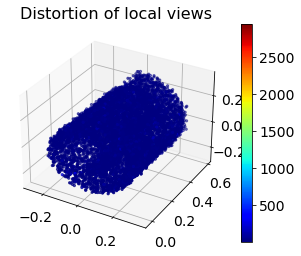

In [8]:
ldle.vis.distortion(X, ldle.LocalViews.local_param_post.zeta,
                    title='Distortion of local views')

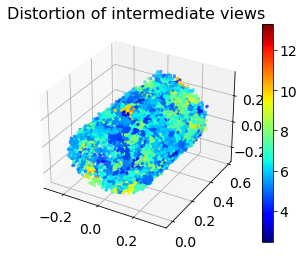

In [9]:
ldle.vis.distortion(X, ldle.IntermedViews.intermed_param.zeta[ldle.IntermedViews.c],
                    title='Distortion of intermediate views')

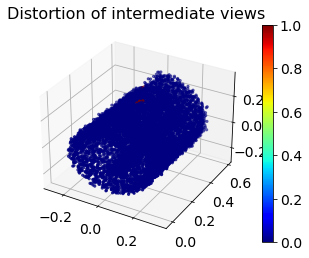

In [10]:
ldle.vis.distortion(X, ldle.IntermedViews.intermed_param.zeta[ldle.IntermedViews.c]<3,
                    title='Distortion of intermediate views')

In [11]:
from pyLDLE2 import global_views_
import copy

def stitch(init_algo, final_algo, max_internal_iter=10, to_tear=True, noise=0):
    ldle.global_opts['to_tear'] = to_tear
    ldle.global_opts['init_algo']['name'] = init_algo
    ldle.global_opts['refine_algo']['name'] = final_algo
    ldle.global_opts['refine_algo']['max_internal_iter'] = max_internal_iter
    ldle.global_opts['compute_error'] = True
    GlobalViews = global_views_.GlobalViews(ldle.exit_at, True, ldle.debug)
    intermed_param = copy.deepcopy(ldle.IntermedViews.intermed_param)
    if noise:
        intermed_param.noise = noise
    GlobalViews.fit(ldle.d, ldle.IntermedViews.Utilde, ldle.IntermedViews.C, ldle.IntermedViews.c,
                    ldle.IntermedViews.n_C, intermed_param, ldle.global_opts, ldle.vis, ldle.vis_opts)
    return GlobalViews

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 232 intermediate views
Ambiguous overlaps checked for 464 intermediate views
Ambiguous overlaps checked for 696 intermediate views
Ambiguous overlaps checked for 928 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 4.3 seconds
Total time elapsed: 4.3 seconds
##############################
Initial alignment of 232 views completed
Initial alignment of 464 views completed
Initial alignment of 696 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.3 seconds
Total time elapsed: 4.6 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.370
##############################
Time elapsed from last time log: 13.0 seconds
T

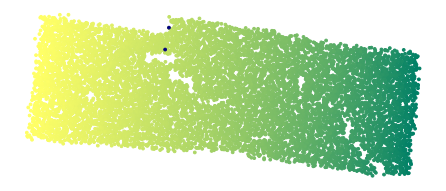

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 27.9 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 24.6 seconds
Total time elapsed: 52.5 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.251
##############################
Time elapsed from last time log: 15.3 seconds
Total time elapsed: 67.8 seconds
##############################


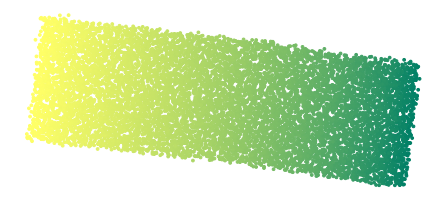

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 1
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 73.1 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 25.6 seconds
Total time elapsed: 98.7 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.241
##############################
Time elapsed from last time log: 14.2 seconds
Total time elapsed: 112.9 seconds
##############################


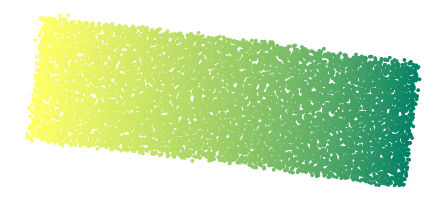

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 2
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 118.1 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 25.9 seconds
Total time elapsed: 144.0 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.239
##############################
Time elapsed from last time log: 14.5 seconds
Total time elapsed: 158.5 seconds
##############################


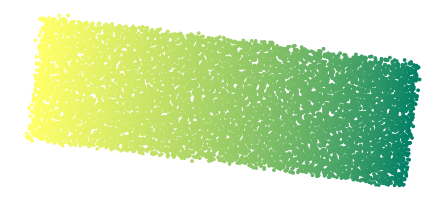

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 3
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 163.7 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.0 seconds
Total time elapsed: 189.7 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.238
##############################
Time elapsed from last time log: 14.7 seconds
Total time elapsed: 204.4 seconds
##############################


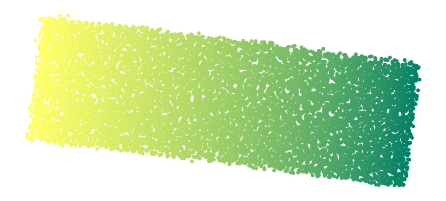

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 4
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 209.7 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.3 seconds
Total time elapsed: 236.0 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.238
##############################
Time elapsed from last time log: 14.8 seconds
Total time elapsed: 250.8 seconds
##############################


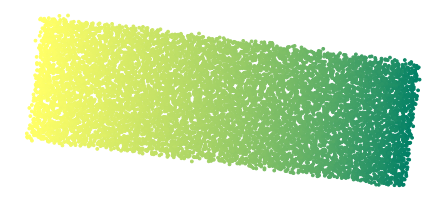

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 5
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 256.0 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.5 seconds
Total time elapsed: 282.5 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.237
##############################
Time elapsed from last time log: 15.0 seconds
Total time elapsed: 297.5 seconds
##############################


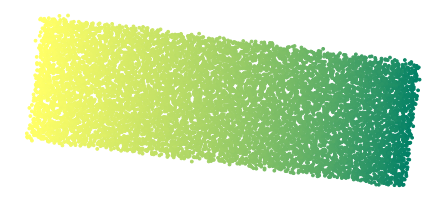

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 6
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 302.8 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.8 seconds
Total time elapsed: 329.6 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.237
##############################
Time elapsed from last time log: 14.8 seconds
Total time elapsed: 344.4 seconds
##############################


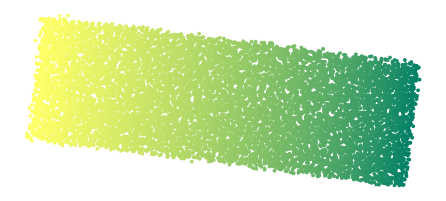

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 7
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 349.6 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.5 seconds
Total time elapsed: 376.1 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.237
##############################
Time elapsed from last time log: 14.9 seconds
Total time elapsed: 391.0 seconds
##############################


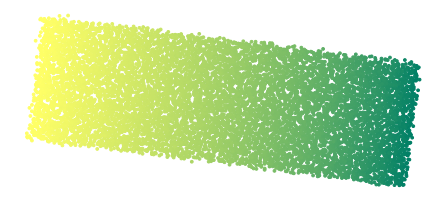

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 8
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 396.2 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.6 seconds
Total time elapsed: 422.7 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.237
##############################
Time elapsed from last time log: 15.0 seconds
Total time elapsed: 437.8 seconds
##############################


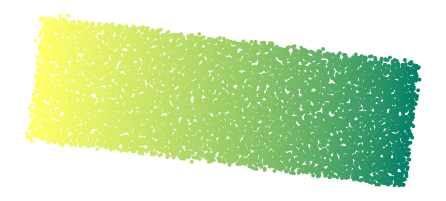

Refining with retraction algorithm for 100 iterations.
Refinement iteration: 9
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 443.0 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Descent starts
Done.
##############################
Time elapsed from last time log: 26.8 seconds
Total time elapsed: 469.8 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.237
##############################
Time elapsed from last time log: 15.0 seconds
Total time elapsed: 484.8 seconds
##############################


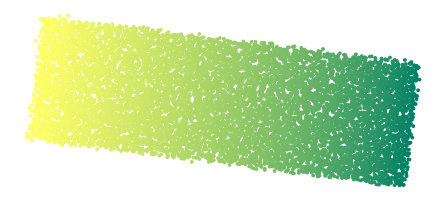

In [12]:
GV_retraction = stitch('sequential', 'retraction', 100)

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 232 intermediate views
Ambiguous overlaps checked for 464 intermediate views
Ambiguous overlaps checked for 696 intermediate views
Ambiguous overlaps checked for 928 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: sequential algorithm
##############################
Time elapsed from last time log: 4.3 seconds
Total time elapsed: 4.3 seconds
##############################
Initial alignment of 232 views completed
Initial alignment of 464 views completed
Initial alignment of 696 views completed
Embedding initialized.
##############################
Time elapsed from last time log: 0.3 seconds
Total time elapsed: 4.6 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.370
##############################
Time elapsed from last time log: 14.3 seconds
T

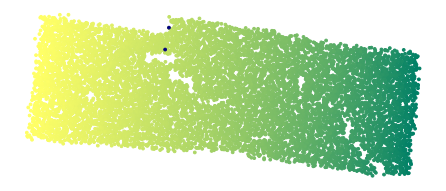

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 0
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 29.1 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 52.8 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.274
##############################
Time elapsed from last time log: 13.5 seconds
Total time elapsed: 66.4 seconds
##############################


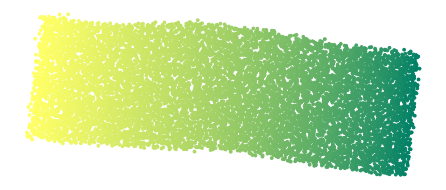

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 1
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 71.6 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 95.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.262
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 108.7 seconds
##############################


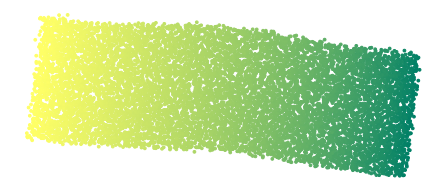

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 2
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 113.9 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 137.6 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.256
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 151.0 seconds
##############################


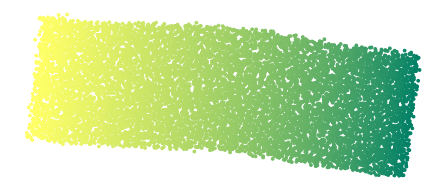

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 3
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 156.2 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 179.9 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.253
##############################
Time elapsed from last time log: 13.3 seconds
Total time elapsed: 193.2 seconds
##############################


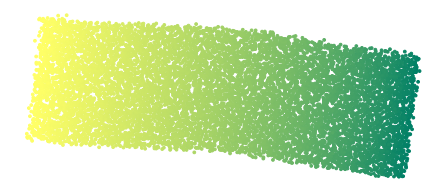

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 4
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 198.4 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 222.1 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.250
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 235.5 seconds
##############################


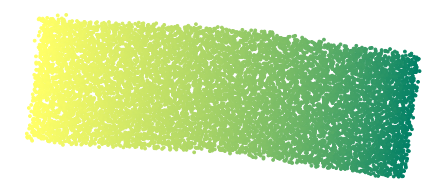

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 5
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 240.6 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 264.3 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.249
##############################
Time elapsed from last time log: 13.3 seconds
Total time elapsed: 277.7 seconds
##############################


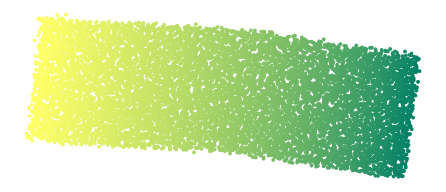

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 6
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 282.8 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.8 seconds
Total time elapsed: 306.6 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.247
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 319.9 seconds
##############################


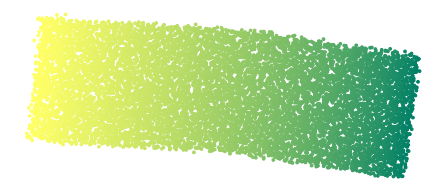

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 7
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 325.1 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.8 seconds
Total time elapsed: 348.9 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.246
##############################
Time elapsed from last time log: 13.3 seconds
Total time elapsed: 362.2 seconds
##############################


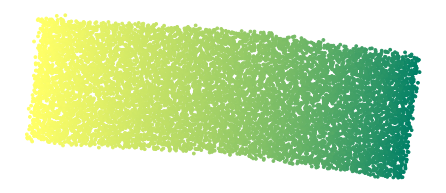

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 8
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 367.4 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 391.1 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.245
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 404.4 seconds
##############################


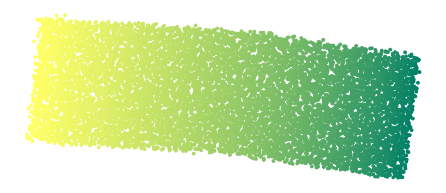

Refining with sequential algorithm for 10 iterations.
Refinement iteration: 9
##############################
Time elapsed from last time log: 0.0 seconds
Total time elapsed: 409.6 seconds
##############################
Done.
##############################
Time elapsed from last time log: 23.7 seconds
Total time elapsed: 433.4 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 0.245
##############################
Time elapsed from last time log: 13.4 seconds
Total time elapsed: 446.7 seconds
##############################


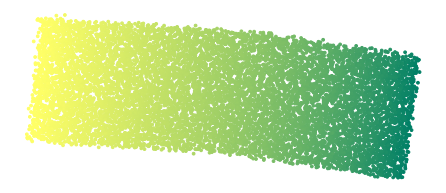

In [13]:
GV_sequential = stitch('sequential', 'sequential', 10)

Ambiguous overlaps checked for 0 intermediate views
Ambiguous overlaps checked for 232 intermediate views
Ambiguous overlaps checked for 464 intermediate views
Ambiguous overlaps checked for 696 intermediate views
Ambiguous overlaps checked for 928 points
Seq of intermediate views and their predecessors computed.
No. of connected components = 1
Computing initial embedding using: spectral algorithm
##############################
Time elapsed from last time log: 4.3 seconds
Total time elapsed: 4.3 seconds
##############################
Computing Pseudoinverse of a matrix of L of size 11188
Computing eigh(C,k=d)
Done.
Embedding initialized.
##############################
Time elapsed from last time log: 20.0 seconds
Total time elapsed: 24.2 seconds
##############################
Computing error.
Computing Pseudoinverse of a matrix of L of size 11188
Alignment error: 25.307
##############################
Time elapsed from last time log: 14.3 seconds
Total time elapsed: 38.5 seconds
#######

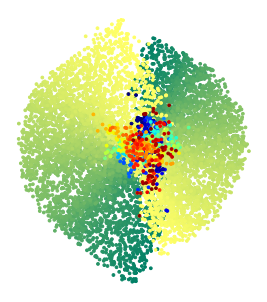

In [14]:
GV_spectral = stitch('spectral', '', 10)

In [15]:
from matplotlib import pyplot as plt
def plot_err_vs_time(tracker, title, label=''):
    t = [0]
    err = [tracker['init_err']]
    for i in range(tracker['refine_iter_start_at'].shape[0]):
        t.append(t[-1] + tracker['refine_iter_done_at'][i]-tracker['refine_iter_start_at'][i])
        err.append(tracker['refine_err_at_iter'][i])
    plt.plot(t[0:], err[0:], '-o', label=label)
    plt.title(title)
    plt.xlabel('time (sec)')
    plt.ylabel('error = tr$(CO^{(k)^T}O^{(k)})$')

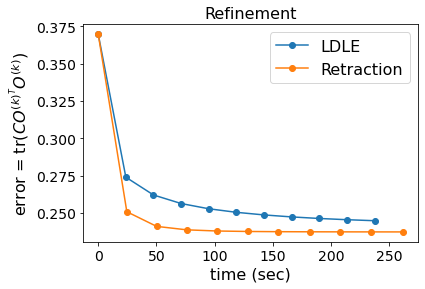

In [16]:
plot_err_vs_time(GV_sequential.tracker, 'Refinement', 'LDLE')
plot_err_vs_time(GV_retraction.tracker, 'Refinement', 'Retraction')
plt.legend()